# Power Spectrum Analysis

In [16]:
import numpy as np
import pandas as pd
import time
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# Globally fix plot styling
mpl.rc('xtick', direction='out', top=True)
mpl.rc('ytick', direction='out', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
import os

experiment = '.3 Voltage Drop Off'
# 1 Degree Circle Convolution,3 Bands, 4 Bands
# .1 Voltage Drop Off,.3 Voltage Drop Off
path = f'./{experiment}/Data'

Wall time: 1.3 s


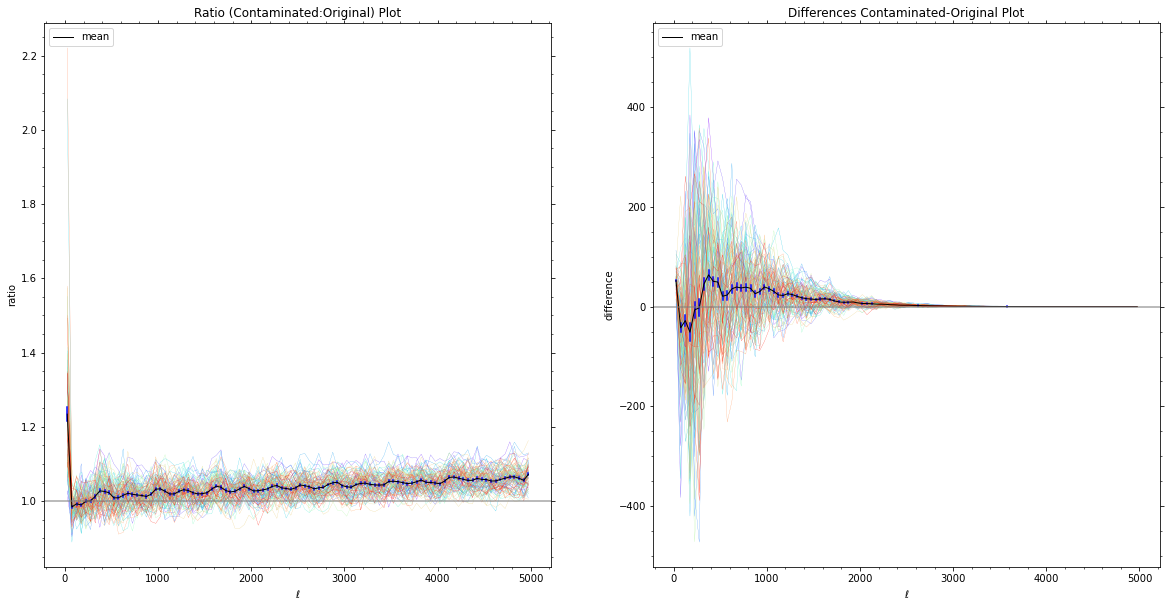

In [17]:
%%time
plt.close()
digit = 16# max:16
files = os.listdir(path)[1:]
color = cm.rainbow(np.linspace(0, 1, int(len(files)))) ###cm.gnuplot2
full1 = []

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)

ax1.set_title('Ratio (Contaminated:Original) Plot')
ax1.set_xlabel('$\ell$')
ax1.set_ylabel(r'ratio')
for i,file in enumerate(files):
    table = pd.read_csv(f'{path}/{file}')
    if i==0:
        full1.append(table['ell'])
    full1.append(np.array(table['ratio']))#(np.array(table['DlTT_c']/table['DlTT']))#(np.array(table['ratio']))
    ax1.plot(table['ell'],table['ratio'],c=color[i],lw=.2)
ells = [int(i) for i in full1[0]]
del full1[0]
at_ell1 = pd.DataFrame(full1,columns=ells)                   ### compilation of all result files
means1 = []
stds1 = []
for title in at_ell1.columns:
    means1.append(np.mean(at_ell1[title]))                  ### mean at each ell
    stds1.append(np.std(at_ell1[title]))                    ### std at each ell

# error=stds/np.sqrt(len(table))
analysis1 = []
for i,std in enumerate(stds1):
    error = std/np.sqrt(len(table))
    analysis1.append([at_ell1.columns[i],means1[i],std,error])
    ax1.plot([at_ell1.columns[i],at_ell1.columns[i]],
            [float(f'{means1[i]:.{digit}f}')+error,float(f'{means1[i]:.{digit}f}')-error],color='b')          ### artificial errorbars
ax1.plot(at_ell1.columns,[float(f'{m:.{digit}f}') for m in means1],color='k',lw=1,label='mean')      ### mean lines
ax1.axhline(1,color='gray',alpha=.7)
ax1.legend(loc='upper left')


##########################################################################3

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Differences Contaminated-Original Plot')
ax2.set_xlabel('$\ell$')
ax2.set_ylabel(r'difference')

full2 = []
for i,file in enumerate(files):
    table = pd.read_csv(f'{path}/{file}')
    full2.append(np.array(table['difference']))
    ax2.plot(table['ell'],table['difference'],c=color[i],lw=.2)
at_ell2 = pd.DataFrame(full2,columns=ells)    

means2 = []
stds2 = []
for title in at_ell2.columns:
    means2.append(np.mean(at_ell2[title]))                  ### mean at each ell
    stds2.append(np.std(at_ell2[title]))                    ### std at each ell

analysis2 = []
for i,std in enumerate(stds2):
    error = std/np.sqrt(len(table))
    analysis2.append([at_ell2.columns[i],means2[i],std,error])
    ax2.plot([at_ell2.columns[i],at_ell2.columns[i]],
            [float(f'{means2[i]:.{digit}f}')+error,float(f'{means2[i]:.{digit}f}')-error],color='b')          ### artificial errorbars
ax2.plot(at_ell2.columns,[float(f'{m:.{digit}f}') for m in means2],color='k',lw=1,label='mean')      ### mean lines
ax2.legend(loc='upper left')
ax2.axhline(0,color='gray',alpha=.7)

fig.savefig(f'{experiment}/Analysis/Compiled_Plots.png')
pd.DataFrame(analysis1,columns=['ell','mean','stdev','error']).to_csv(f'{experiment}/Analysis/Ratio_Analyis.csv',index=False)
pd.DataFrame(analysis2,columns=['ell','mean','stdev','error']).to_csv(f'{experiment}/Analysis/Difference_Analyis.csv',index=False)

Wall time: 4.01 s


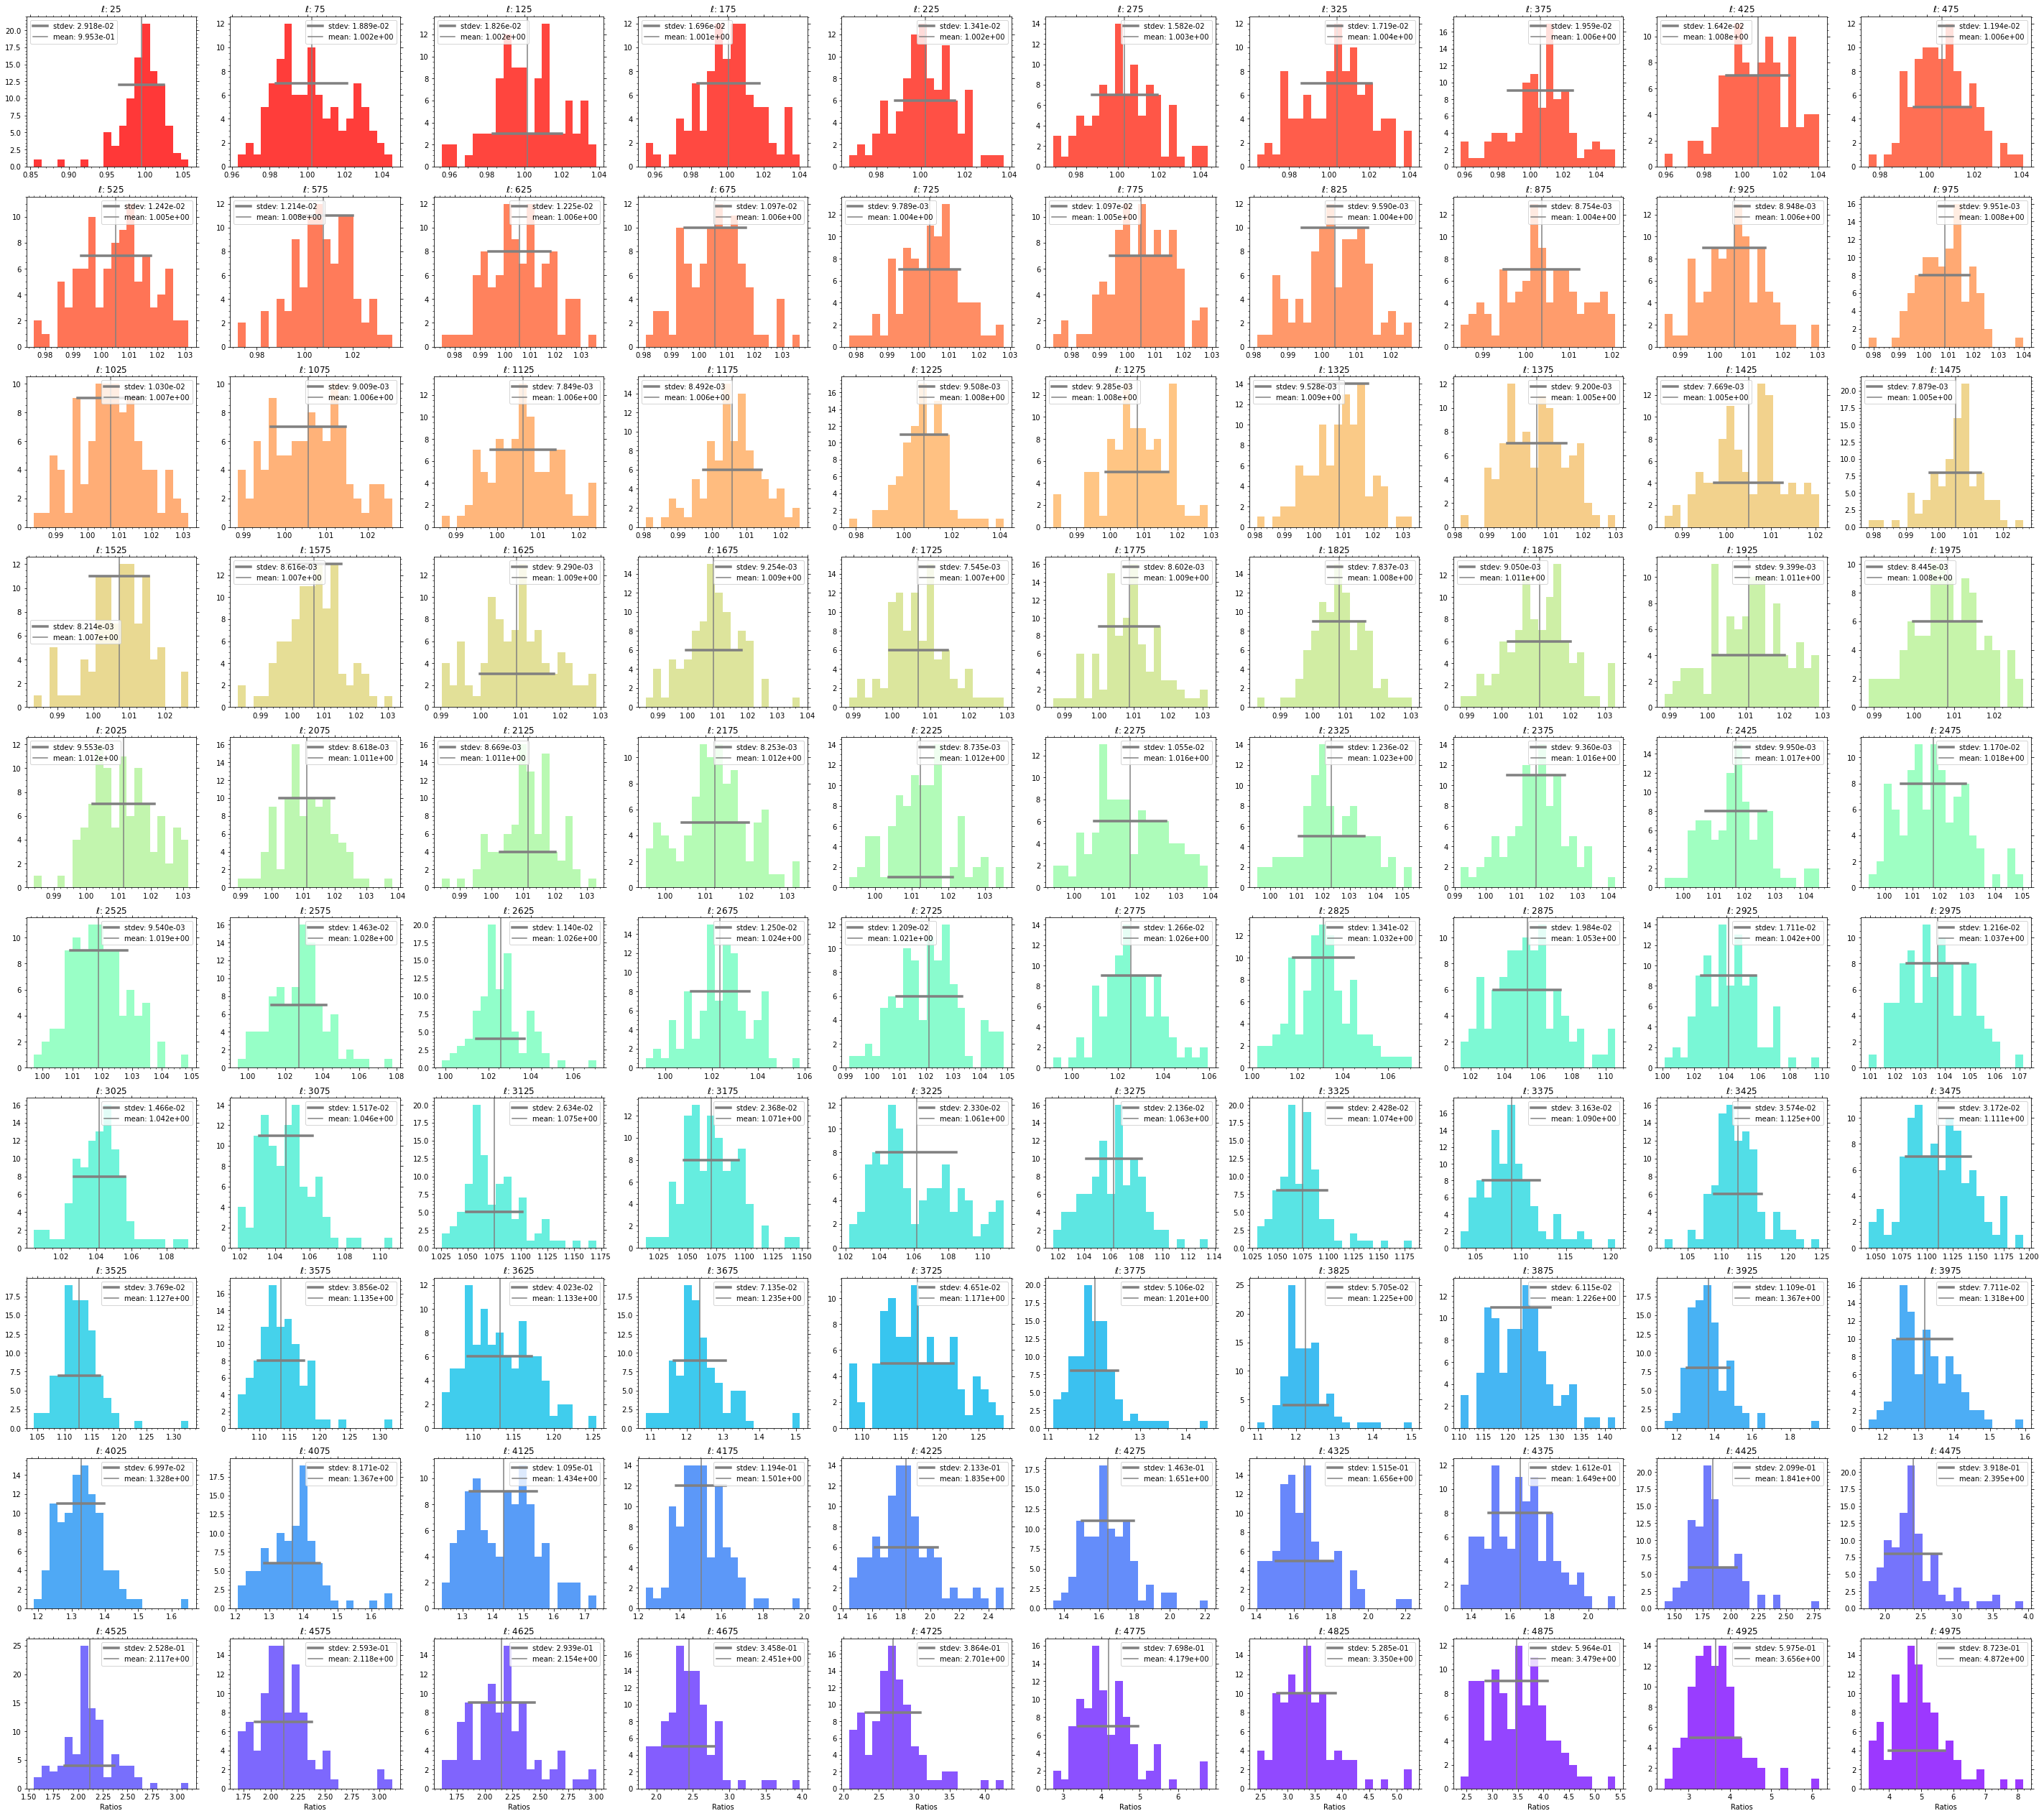

In [5]:
%%time
plt.close()
color = cm.rainbow(np.linspace(1,0,int(len(at_ell1.columns)))) #gnuplot2(.9, .2)
bins = 20

fig2_1 = plt.figure(figsize=(50,50))
for i,x in enumerate(at_ell1.columns):
    mean = np.mean(at_ell1[x])
    stdev = np.std(at_ell1[x])
    plus = mean+stdev
    minus = mean-stdev
    hist,edges = np.histogram(at_ell1[x],bins=bins)
    bincent=(0.5*(edges[1:]+edges[:-1]))
    ax2_1 = fig2_1.add_subplot(int(np.sqrt(len(at_ell1.columns))+1),int(np.sqrt(len(at_ell1.columns))),i+1)
    ax2_1.set_title(f'$\ell$: {x}')
    if stdev<1e-14:
        ax2_1.hist(at_ell1[x],bins=bins,alpha=.78,color=color[i])
        ax2_1.set_xlim(minus-(bincent[1]-bincent[0]),plus+(bincent[1]-bincent[0]))
    else:
        ax2_1.hist(at_ell1[x],bins=bins,alpha=.78,color=color[i])
    if hist[minus>=bincent][-1] >= hist[plus>=bincent][-1]:
        ax2_1.plot([minus,plus],[hist[minus>=bincent][-1],hist[minus>=bincent][-1]],
                 lw=3.5,color='gray',label=f'stdev: {stdev:.3e}')
    elif hist[minus>=bincent][-1] < hist[plus>=bincent][-1]:
        ax2_1.plot([minus,plus],[hist[plus>=bincent][-1],hist[plus>=bincent][-1]],
                 lw=3.5,color='gray',label=f'stdev: {stdev:.3e}')
    ax2_1.axvline(mean,color='gray',label=f'mean: {mean:.3e}')
    ax2_1.legend()
    if i >= int(np.sqrt(len(at_ell1.columns))-1)*int(np.sqrt(len(at_ell1.columns))):
        ax2_1.set_xlabel(f'Ratios')
    
# fig2_1.savefig(f'{experiment}/Analysis/Compiled_Ratio_Histograms.png')

Wall time: 2.92 s


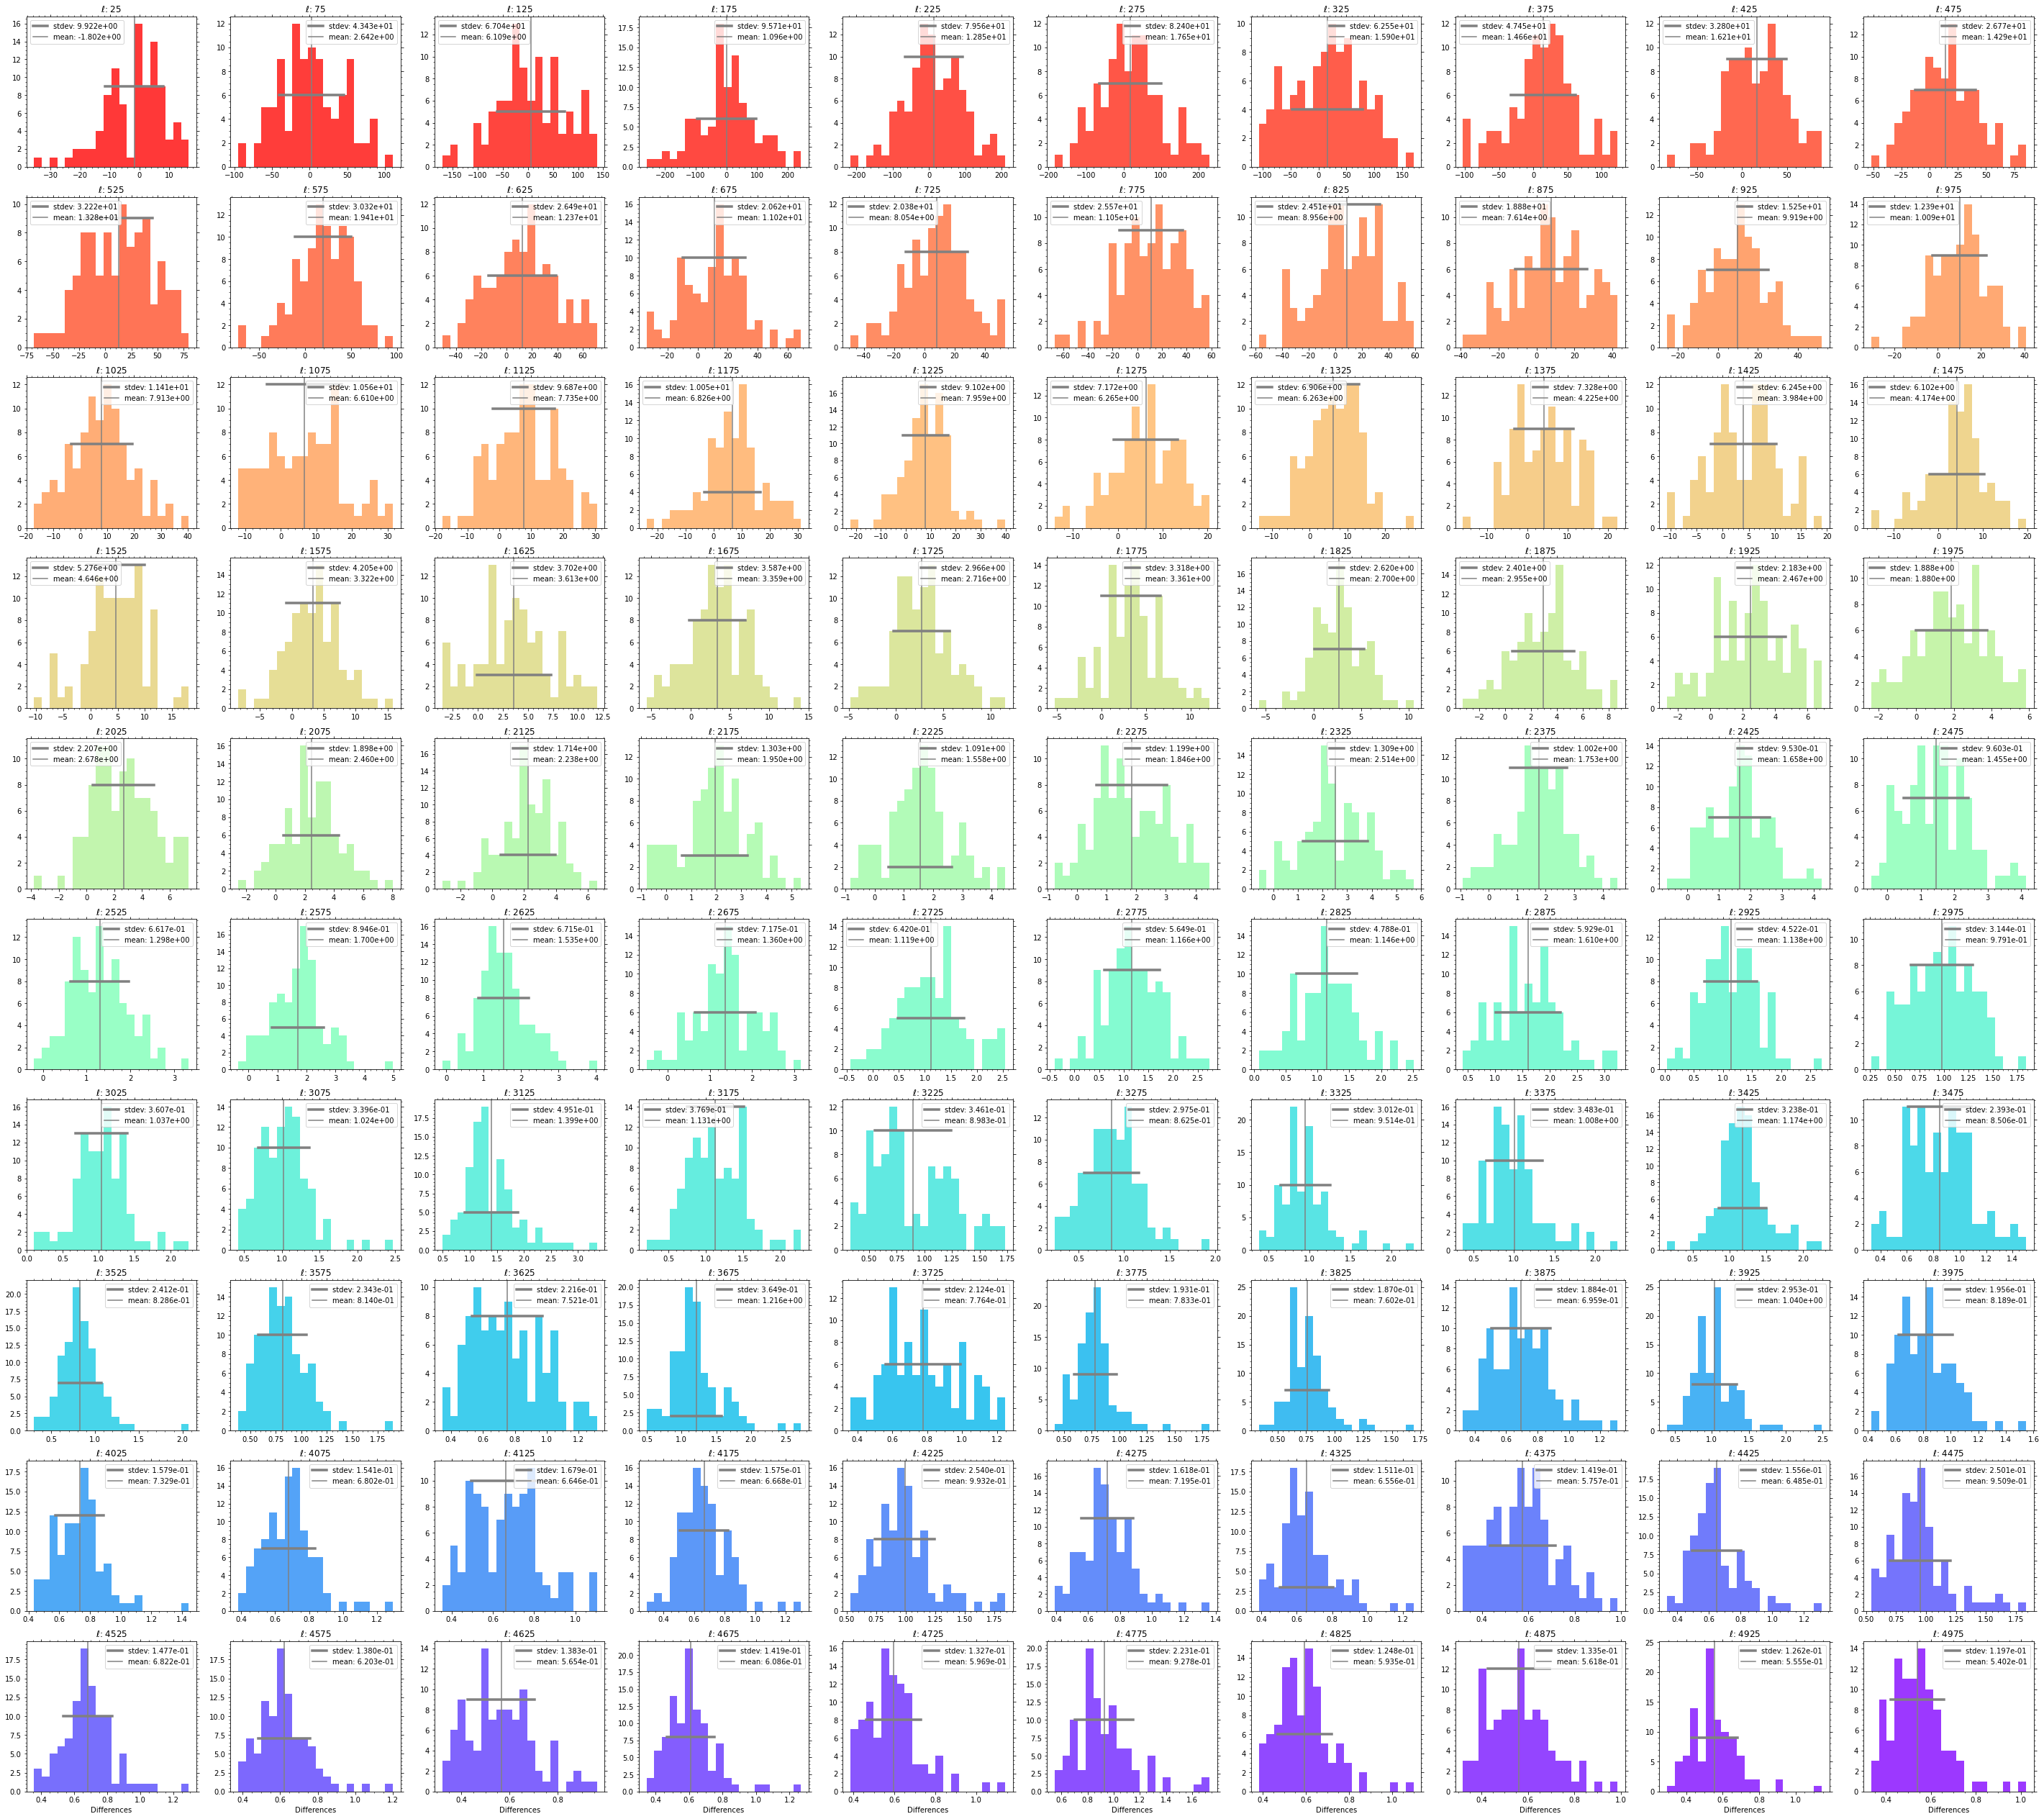

In [6]:
%%time
plt.close()
color = cm.rainbow(np.linspace(1,0,int(len(at_ell2.columns)))) #gnuplot2(.9, .2)
bins = 20

fig2_2 = plt.figure(figsize=(50,50))
for i,x in enumerate(at_ell2.columns):
    mean = np.mean(at_ell2[x])
    stdev = np.std(at_ell2[x])
    plus = mean+stdev
    minus = mean-stdev
    hist,edges = np.histogram(at_ell2[x],bins=bins)
    bincent=(0.5*(edges[1:]+edges[:-1]))
    ax2_2 = fig2_2.add_subplot(int(np.sqrt(len(at_ell2.columns))+1),int(np.sqrt(len(at_ell2.columns))),i+1)
    ax2_2.set_title(f'$\ell$: {x}')
    if stdev<1e-14:
        ax2_2.hist(at_ell2[x],bins=bins,alpha=.78,color=color[i])
        ax2_2.set_xlim(minus-(bincent[1]-bincent[0]),plus+(bincent[1]-bincent[0]))
    else:
        ax2_2.hist(at_ell2[x],bins=bins,alpha=.78,color=color[i])
    if hist[minus>=bincent][-1] >= hist[plus>=bincent][-1]:
        ax2_2.plot([minus,plus],[hist[minus>=bincent][-1],hist[minus>=bincent][-1]],
                 lw=3.5,color='gray',label=f'stdev: {stdev:.3e}')
    elif hist[minus>=bincent][-1] < hist[plus>=bincent][-1]:
        ax2_2.plot([minus,plus],[hist[plus>=bincent][-1],hist[plus>=bincent][-1]],
                 lw=3.5,color='gray',label=f'stdev: {stdev:.3e}')
    ax2_2.axvline(mean,color='gray',label=f'mean: {mean:.3e}')
    ax2_2.legend()
    if i >= int(np.sqrt(len(at_ell2.columns))-1)*int(np.sqrt(len(at_ell2.columns))):
        ax2_2.set_xlabel(f'Differences')
    
# fig2_2.savefig(f'{experiment}/Analysis/Compiled_Difference_Histograms.png')